<a href="https://colab.research.google.com/github/krucx/ML_from_scratch/blob/main/Svm_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# global variables
boundary = [0.5,-1,0.25]

In [ ]:
def createDataset(theta=[0.5,-1,0.25],n=100,margin=0.2):
  X=[]
  Y=[]
  i=0
  while i<n:
    x = [np.random.rand(), np.random.rand()]
    if x[0]*theta[0] + x[1]*theta[1] + theta[2]>=margin:
      Y.append(1)
      X.append(x)
      i+=1
    elif x[0]*theta[0] + x[1]*theta[1] + theta[2]<=-margin:
      Y.append(-1)
      X.append(x)
      i+=1
  return X,Y

In [ ]:
def visualize_dataset_with_basis(X,Y,theta,line_color='g'):
  color = ['r' if i==1 else 'b' for i in Y]
  xs=[]
  ys=[]
  for i,j in X:
    xs.append(i)
    ys.append(j)
  plt.scatter(x=xs,y=ys,c=color)
  plt.plot(xs,(-theta[0]*np.array(xs)-theta[2])/theta[1],c=line_color)

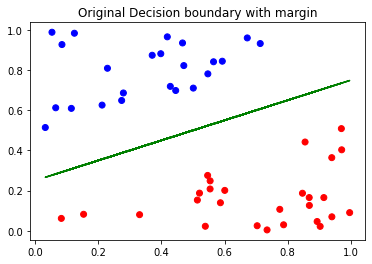

In [ ]:
X_t,Y_t = createDataset(boundary,50,0.2)
plt.title('Original Decision boundary with margin')
visualize_dataset_with_basis(X_t,Y_t,boundary)

In [ ]:
X_t = np.array(X_t)
X = np.append(X_t,np.ones((X_t.shape[0],1)),axis=1)
Y = np.array(Y_t)

print(Y.shape)
print(X.shape)

(50,)
(50, 3)


In [ ]:
def shuffle(X,Y):
  m = X.shape[1]
  y = Y.reshape((Y.shape[0],1))
  combined = np.append(X,y,axis=1)
  np.random.shuffle(combined)
  return combined[:,:m],combined[:,m:].reshape(Y.shape[0])

In [ ]:
def hingeloss1(X,Y,theta):
  return (1/X.shape[0])*np.sum(((1-Y*np.dot(X,theta.T))>0)*(1-Y*np.dot(X,theta.T)))

In [ ]:
def Svm(X,Y,theta,epochs=1000,C=1,lr=0.01):
  loss = []
  for j in range(epochs):
    for i in range(X.shape[0]):
      if Y[i]*np.dot(X[i],theta) < 1:
        theta = (1-lr)*theta +lr*C*Y[i]*X[i] 
    loss.append(hingeloss1(X,Y,theta))
  return theta,loss

[ 2.28708059 -5.18642053  1.45939039]
0.0


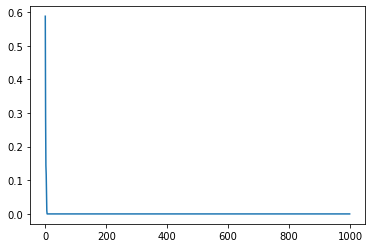

In [ ]:
epochs = 1000
C = 50
X,Y=shuffle(X,Y)
theta = np.random.randn(X.shape[1])
theta,loss = Svm(X,Y,theta,epochs,C,0.01)
print(theta)
print(loss[-1])
plt.plot(range(len(loss)),loss)
plt.show()

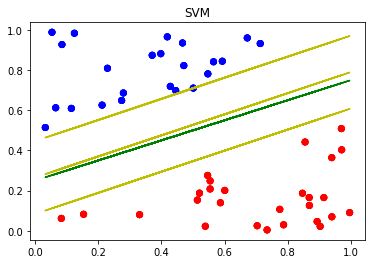

In [ ]:
plt.title('SVM')
support_vector1 = theta + [0,0,1]
support_vector2 = theta + [0,0,-1]
visualize_dataset_with_basis(X_t,Y_t,theta,'y')
visualize_dataset_with_basis(X_t,Y_t,support_vector1,'y')
visualize_dataset_with_basis(X_t,Y_t,support_vector2,'y')
visualize_dataset_with_basis(X_t,Y_t,boundary,'g')